In [96]:
from pyspark.sql import SparkSession
from pyspark.ml.image import ImageSchema
from pyspark.ml.feature import PCA
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, FloatType
import os
import numpy as np
import io
from PIL import Image

In [97]:
if SparkSession.builder.getOrCreate().sparkContext:
    SparkSession.builder.getOrCreate().sparkContext.stop()

spark = (SparkSession
             .builder
             .appName('test2-spark')
             .master('local')
             .config("spark.sql.parquet.writeLegacyFormat", 'true')
             .getOrCreate()
)

In [98]:
PATH = os.getcwd()
PATH_Data = PATH+'/data/Test1'
PATH_Result = PATH+'/data/results'
print('PATH:        '+\
      PATH+'\nPATH_Data:   '+\
      PATH_Data+'\nPATH_Result: '+PATH_Result)

PATH:        /Users/gaeldelescluse/Documents/OpenClassRooms/2.Projets/Projet11/ai-cloud-computing-spark/train
PATH_Data:   /Users/gaeldelescluse/Documents/OpenClassRooms/2.Projets/Projet11/ai-cloud-computing-spark/train/data/Test1
PATH_Result: /Users/gaeldelescluse/Documents/OpenClassRooms/2.Projets/Projet11/ai-cloud-computing-spark/train/data/results


In [99]:
sc = spark.sparkContext
spark

In [100]:
df = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load(PATH_Data)

In [101]:
df.show()

+--------------------+-------------------+------+--------------------+
|                path|   modificationTime|length|             content|
+--------------------+-------------------+------+--------------------+
|file:/Users/gaeld...|2021-09-12 19:25:42|  5656|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5627|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5613|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5611|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5611|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5606|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5606|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5602|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5599|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5597|[FF D8 FF E0 00 1...|
|file:/Users/gaeld...|2021-09-12 19:25:42|  5594|[FF D8 FF E0 00 1...|
|file:

In [102]:
first_row = df.select("content").first()
first_row

Row(content=bytearray(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00d\x00d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\

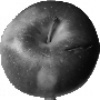

In [103]:
content_value = first_row.content
img = Image.open(io.BytesIO(content_value)).convert('L')
img

In [104]:
test_array = np.array(img).flatten().tolist()
test_array

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 255,
 254,
 254,
 254,
 255,
 254,
 254,
 254,
 254,
 254,
 250,
 253,
 254,
 251,
 255,
 254,
 251,
 255,
 255,
 249,
 254,
 252,
 254,
 252,
 250,
 251,
 248,
 247,
 250,
 211,
 130,
 122,
 115,
 104,
 112,
 115,
 123,
 132,
 186,
 249,
 249,
 250,
 252,
 251,
 252,
 254,
 253,
 252,
 251,
 253,
 253,
 255,
 249,
 254,
 253,
 252,
 254,
 253,
 254,
 255,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 254,
 255,
 255,
 255,
 255,
 254,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 255,
 255,
 252,
 255,
 255,
 252,
 255,
 249,
 252,
 255,
 251,
 252,
 253,
 252,
 250,
 245,
 146,
 95,
 69,
 76,
 79,
 79,
 77,
 65,
 60,
 60,
 54,
 57,
 56,
 55,
 51,
 69,
 76,
 66,
 69,
 58,
 55,
 57,
 98,
 199,
 252,
 253,
 253,
 255,
 251,
 254,
 2

In [105]:
def process_row(row):
    content_value = row.content
    img = Image.open(io.BytesIO(content_value)).convert('L')
    return np.array(img).flatten().tolist()

result_array = df.select("content").rdd.map(process_row).collect()

In [106]:
len(result_array)

492

In [107]:
from pyspark.sql.functions import monotonically_increasing_id

result_rdd = spark.sparkContext.parallelize(result_array).zipWithIndex().map(lambda x: (x[1], x[0]))
schema = ["id", "pixels"]
pixels_df = spark.createDataFrame(result_rdd, schema)

# Ajout d'un ID au DataFrame original pour la jointure
df_with_id = df.withColumn("id", monotonically_increasing_id())

# Jointure des deux DataFrames sur l'ID
final_df = df_with_id.join(pixels_df, on="id")

# Affichage du résultat
final_df.show()

24/05/28 09:48:44 WARN TaskSetManager: Stage 3 contains a task of very large size (9628 KiB). The maximum recommended task size is 1000 KiB.
24/05/28 09:48:45 WARN TaskSetManager: Stage 5 contains a task of very large size (9628 KiB). The maximum recommended task size is 1000 KiB.


+---+--------------------+-------------------+------+--------------------+--------------------+
| id|                path|   modificationTime|length|             content|              pixels|
+---+--------------------+-------------------+------+--------------------+--------------------+
|  0|file:/Users/gaeld...|2021-09-12 19:25:42|  5656|[FF D8 FF E0 00 1...|[255, 255, 255, 2...|
|  1|file:/Users/gaeld...|2021-09-12 19:25:42|  5627|[FF D8 FF E0 00 1...|[255, 255, 255, 2...|
|  2|file:/Users/gaeld...|2021-09-12 19:25:42|  5613|[FF D8 FF E0 00 1...|[255, 255, 255, 2...|
|  3|file:/Users/gaeld...|2021-09-12 19:25:42|  5611|[FF D8 FF E0 00 1...|[255, 255, 255, 2...|
|  4|file:/Users/gaeld...|2021-09-12 19:25:42|  5611|[FF D8 FF E0 00 1...|[255, 255, 255, 2...|
|  5|file:/Users/gaeld...|2021-09-12 19:25:42|  5606|[FF D8 FF E0 00 1...|[255, 255, 255, 2...|
|  6|file:/Users/gaeld...|2021-09-12 19:25:42|  5606|[FF D8 FF E0 00 1...|[255, 255, 255, 2...|
|  7|file:/Users/gaeld...|2021-09-12 19:

In [89]:
def image_to_vector(image):
    image = image.content
    img = Image.open(io.BytesIO(image)).convert('L')  # Convertir en niveaux de gris
    return np.array(img).flatten().tolist()

In [66]:
image_to_vector_udf = udf(image_to_vector, ArrayType(FloatType()))
df = df.withColumn("pixels", image_to_vector_udf(df.content))

In [67]:
df.show()

24/05/28 09:36:29 ERROR Executor: Exception in task 0.0 in stage 2.0 (TID 2)/ 1]
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_39280/1446602329.py", line 2, in image_to_vector
AttributeError: 'bytearray' object has no attribute 'content'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:94)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:75)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_39280/1446602329.py", line 2, in image_to_vector
AttributeError: 'bytearray' object has no attribute 'content'


In [33]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.functions import vector_to_array, array_to_vector

df = df.withColumn("features", array_to_vector("pixels"))

In [35]:
df.show()

24/05/28 09:19:55 ERROR Executor: Exception in task 0.0 in stage 2.0 (TID 2)
org.apache.spark.SparkRuntimeException: Error while decoding: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
mapobjects(lambdavariable(MapObject, FloatType, true, -1), assertnotnull(cast(lambdavariable(MapObject, FloatType, true, -1) as double)), input[0, array<float>, true], Some(interface scala.collection.Seq)).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.expressionDecodingError(QueryExecutionErrors.scala:1405)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:185)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.$anonfun$scalaConverter$2(ScalaUDF.scala:171)
	at org

Py4JJavaError: An error occurred while calling o260.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 2.0 failed 1 times, most recent failure: Lost task 0.0 in stage 2.0 (TID 2) (192.168.0.15 executor driver): org.apache.spark.SparkRuntimeException: Error while decoding: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
mapobjects(lambdavariable(MapObject, FloatType, true, -1), assertnotnull(cast(lambdavariable(MapObject, FloatType, true, -1) as double)), input[0, array<float>, true], Some(interface scala.collection.Seq)).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.expressionDecodingError(QueryExecutionErrors.scala:1405)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:185)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.$anonfun$scalaConverter$2(ScalaUDF.scala:171)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificSafeProjection.MapObjects_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificSafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:182)
	... 21 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkRuntimeException: Error while decoding: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
mapobjects(lambdavariable(MapObject, FloatType, true, -1), assertnotnull(cast(lambdavariable(MapObject, FloatType, true, -1) as double)), input[0, array<float>, true], Some(interface scala.collection.Seq)).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.expressionDecodingError(QueryExecutionErrors.scala:1405)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:185)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.$anonfun$scalaConverter$2(ScalaUDF.scala:171)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificSafeProjection.MapObjects_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificSafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:182)
	... 21 more


In [34]:
pca = PCA(k=50, inputCol="features", outputCol="pca_features")
model = pca.fit(df)
result = model.transform(df)

24/05/28 09:18:50 ERROR Executor: Exception in task 0.0 in stage 1.0 (TID 1)/ 1]
org.apache.spark.SparkRuntimeException: Error while decoding: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
mapobjects(lambdavariable(MapObject, FloatType, true, -1), assertnotnull(cast(lambdavariable(MapObject, FloatType, true, -1) as double)), input[0, array<float>, true], Some(interface scala.collection.Seq)).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.expressionDecodingError(QueryExecutionErrors.scala:1405)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:185)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.$anonfun$scalaConverter$2(ScalaUDF.scala:171)
	at

Py4JJavaError: An error occurred while calling o261.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 1.0 failed 1 times, most recent failure: Lost task 0.0 in stage 1.0 (TID 1) (192.168.0.15 executor driver): org.apache.spark.SparkRuntimeException: Error while decoding: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
mapobjects(lambdavariable(MapObject, FloatType, true, -1), assertnotnull(cast(lambdavariable(MapObject, FloatType, true, -1) as double)), input[0, array<float>, true], Some(interface scala.collection.Seq)).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.expressionDecodingError(QueryExecutionErrors.scala:1405)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:185)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.$anonfun$scalaConverter$2(ScalaUDF.scala:171)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$SliceIterator.hasNext(Iterator.scala:268)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at scala.collection.AbstractIterator.to(Iterator.scala:1431)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at scala.collection.AbstractIterator.toBuffer(Iterator.scala:1431)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at scala.collection.AbstractIterator.toArray(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$take$2(RDD.scala:1492)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificSafeProjection.MapObjects_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificSafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:182)
	... 37 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.rdd.RDD.$anonfun$take$1(RDD.scala:1492)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.take(RDD.scala:1465)
	at org.apache.spark.rdd.RDD.$anonfun$first$1(RDD.scala:1506)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.first(RDD.scala:1506)
	at org.apache.spark.mllib.feature.PCA.fit(PCA.scala:44)
	at org.apache.spark.ml.feature.PCA.fit(PCA.scala:93)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkRuntimeException: Error while decoding: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
mapobjects(lambdavariable(MapObject, FloatType, true, -1), assertnotnull(cast(lambdavariable(MapObject, FloatType, true, -1) as double)), input[0, array<float>, true], Some(interface scala.collection.Seq)).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.expressionDecodingError(QueryExecutionErrors.scala:1405)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:185)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.$anonfun$scalaConverter$2(ScalaUDF.scala:171)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$SliceIterator.hasNext(Iterator.scala:268)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at scala.collection.AbstractIterator.to(Iterator.scala:1431)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at scala.collection.AbstractIterator.toBuffer(Iterator.scala:1431)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at scala.collection.AbstractIterator.toArray(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$take$2(RDD.scala:1492)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.lang.NullPointerException: Null value appeared in non-nullable field:
- array element class: "double"
- root class: "scala.collection.Seq"
If the schema is inferred from a Scala tuple/case class, or a Java bean, please try to use scala.Option[_] or other nullable types (e.g. java.lang.Integer instead of int/scala.Int).
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificSafeProjection.MapObjects_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificSafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.encoders.ExpressionEncoder$Deserializer.apply(ExpressionEncoder.scala:182)
	... 37 more


In [7]:
import io
import numpy as np

def binary_to_vector(binary_data):
    image = Image.open(io.BytesIO(binary_data))
    image = image.convert('L')  # Convertir en niveau de gris
    image_array = np.array(image).flatten()  # Aplatir l'image en un vecteur 1D
    return image_array.tolist()

In [8]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, FloatType

binary_to_vector_udf = udf(binary_to_vector, ArrayType(FloatType()))

In [9]:
df_with_vectors = df.withColumn("features", binary_to_vector_udf(df["content"]))

In [10]:
df_with_vectors.show()

24/05/28 09:06:07 ERROR Executor: Exception in task 0.0 in stage 1.0 (TID 1)/ 1]
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_39280/713650167.py", line 5, in binary_to_vector
NameError: name 'Image' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:94)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:75)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.sc

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_39280/713650167.py", line 5, in binary_to_vector
NameError: name 'Image' is not defined


In [17]:
from pyspark.ml.linalg import Vectors, DenseVector, VectorUDT

def to_vector(array):
    return Vectors.dense(array)

to_vector_udf = udf(to_vector, VectorUDT())

In [18]:
df_with_vectors = df_with_vectors.withColumn("features", to_vector_udf(df_with_vectors["features"]))

In [19]:
from pyspark.ml.feature import PCA

num_components = 50

# Appliquer PCA
pca = PCA(k=num_components, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(df_with_vectors)
df_pca = pca_model.transform(df_with_vectors)

# Afficher les résultats
df_pca.select("pca_features").show(truncate=False)

24/05/28 00:05:09 ERROR Executor: Exception in task 0.0 in stage 1.0 (TID 1)/ 1]
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_18013/713650167.py", line 5, in binary_to_vector
NameError: name 'Image' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:94)
	at org.apache.spark.sql.execution.python.BasePythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:75)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.sc

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_18013/713650167.py", line 5, in binary_to_vector
NameError: name 'Image' is not defined


In [11]:
from pyspark.ml.feature import PCA

In [12]:
pca = PCA(k=20, inputCol="content", outputCol="pca_features")
pca_model = pca.fit(df)
df_pca = pca_model.transform(df)

IllegalArgumentException: requirement failed: Column content must be of type class org.apache.spark.ml.linalg.VectorUDT:struct<type:tinyint,size:int,indices:array<int>,values:array<double>> but was actually class org.apache.spark.sql.types.BinaryType$:binary.